# Support Vector Machine

In [18]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

#서포트 벡터 머신
from sklearn.svm import SVR

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [19]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/DIABETES.csv", engine = "python", encoding="CP949")
df_raw.shape

(442, 11)

In [20]:
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [21]:
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [22]:
df_temp = df_raw_x['GENDER']
df_raw_x = df_raw_x.drop("GENDER", axis = 1, inplace = False)

In [23]:
v_feature_name = df_raw_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [24]:
df_temp = pd.DataFrame(df_temp)
df_scaled['GENDER'] = df_temp['GENDER']
df_scaled

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,2
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,1
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,2
3,-1.872441,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,1
4,0.113172,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,1
5,-1.948811,-0.855583,-0.408741,-1.450445,-1.666931,0.867796,-1.606102,-0.865679,-2.025562,1
6,-0.956004,-0.991541,-0.336359,-0.842963,-0.521390,0.016374,-0.830301,-1.322752,-0.806403,2
7,1.335088,-0.039834,1.400804,1.905174,2.289794,0.480786,0.372192,-0.752992,0.064426,2
8,0.876870,1.297088,-0.843032,-0.293335,0.130383,-0.602843,-0.054499,-0.314510,0.238591,2
9,-1.490592,0.821235,-0.698268,-0.264408,-0.725481,-0.525441,-0.054499,1.424090,-0.283906,1


In [25]:
df_train_y, df_test_y = train_test_split(df_raw_y, test_size = 0.3, random_state=42)
print("train data Y size : {}".format(df_train_y.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data Y size : (309,)
test data Y size : (133,)


In [26]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state=42)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (309, 10)
test data X size : (133, 10)


In [27]:
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Score on training set : {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Score on training set : 0.154
Score on test set : 0.176


In [28]:
train_score = []; test_score = []

para_C = [10 ** c for c in range (-2,5)]

for v_C in para_C :
    svm = SVR(C= v_C)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    
df_score_C = pd.DataFrame()
df_score_C["C"] = para_C
df_score_C["TrainScore"] = train_score
df_score_C["TestScore"] = test_score


df_score_C["D"] = df_score_C["TrainScore"]-df_score_C["TestScore"]

df_score_C.round(3)

,C,TrainScore,TestScore,D
0,0.01,-0.020,-0.004,-0.016
1,0.10,0.003,0.019,-0.016
2,1.00,0.154,0.176,-0.022
3,10.00,0.522,0.492,0.030
4,100.00,0.666,0.482,0.184
5,1000.00,0.826,0.119,0.707
6,10000.00,0.967,-0.874,1.841


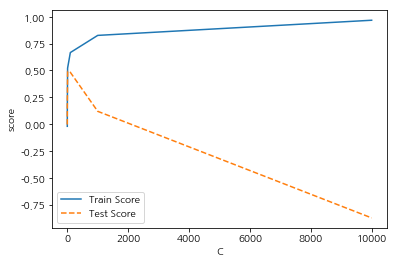

In [29]:
plt.plot(para_C, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_C, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("C")
plt.legend()

In [30]:
train_score = []; test_score = []

para_gamma = [10 ** gamma for gamma in range (-2,3)]

for v_gamma in para_gamma :
    svm = SVR(gamma = v_gamma, C = 10)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    
df_score_gamma = pd.DataFrame()
df_score_gamma["gamma"] = para_gamma
df_score_gamma["TrainScore"] = train_score
df_score_gamma["TestScore"] = test_score


df_score_gamma["D"] = df_score_gamma["TrainScore"]-df_score_gamma["TestScore"]

df_score_gamma.round(3)

,gamma,TrainScore,TestScore,D
0,0.01,0.443,0.439,0.004
1,0.10,0.522,0.492,0.030
2,1.00,0.213,0.049,0.164
3,10.00,0.176,-0.007,0.183
4,100.00,0.176,-0.007,0.183


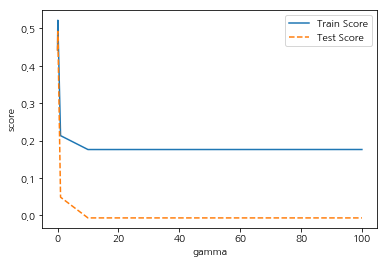

In [31]:
plt.plot(para_gamma, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_gamma, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("gamma")
plt.legend()

In [32]:
train_score = []; test_score = []

para_epsilon = [eps /20 for eps in range (1,21)]

for v_epsilon in para_epsilon :
    svm = SVR(epsilon = v_epsilon, C = 10, gamma = 0.1)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    
df_score_epsilon = pd.DataFrame()
df_score_epsilon["epsilon"] = para_epsilon
df_score_epsilon["TrainScore"] = train_score
df_score_epsilon["TestScore"] = test_score


df_score_epsilon["D"] = df_score_epsilon["TrainScore"]-df_score_epsilon["TestScore"]

df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore,D
0,0.05,0.522,0.492,0.030
1,0.10,0.522,0.492,0.030
2,0.15,0.521,0.492,0.030
3,0.20,0.521,0.492,0.030
4,0.25,0.521,0.492,0.030
5,0.30,0.521,0.492,0.029
6,0.35,0.521,0.492,0.029
7,0.40,0.521,0.492,0.029
8,0.45,0.521,0.492,0.029
9,0.50,0.521,0.492,0.029


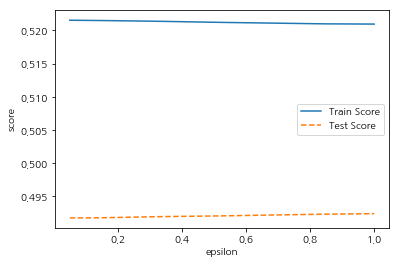

In [33]:
plt.plot(para_epsilon, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_epsilon, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("epsilon")
plt.legend()

In [34]:
svm_final = SVR(C = 10, gamma = 0.1, epsilon = 0.5)
svm_final.fit(df_scaled_train_x, df_train_y)

print("Score on training set: {:.3f}".format(svm_final.score(df_scaled_train_x,df_train_y)))
print("score on test seg: {:.3f}".format(svm_final.score(df_scaled_test_x,df_test_y)))

Score on training set: 0.521
score on test seg: 0.492


In [35]:
estimator = SVR()

param_grid = {"C":para_C, "gamma": para_gamma, "epsilon" : para_epsilon}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_scaled_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

best estimator model : 
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

best parameter : 
{'C': 100, 'epsilon': 0.05, 'gamma': 0.01}

best score : 
0.457
